# Overview
For this project I  will be using the IMDB dataset.

This data set contains 20 columns and over 10 thousand rows of movie data such as the cast, budget, genre etc.

#### Questions
1. What genre has the most movies.
2. What genre has the most movies per year on average
3. Genre with the least profit
4. Genre with the most profit

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
df_plain = pd.read_csv('imdb_movies.csv')
df_plain.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


# General investigation

In [17]:
# view the tail of the data
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0,Documentary
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0,Action
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0,Mystery
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0,Action
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0,Horror


In [19]:
#Data dimensions 
df.shape

(10866, 21)

In [23]:
#get column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count         

In [25]:
#See if the release date column is a str

type(df['release_date'][0])

str

# Obsevations thus far
No unit of currency is mentioned in the dataset. For the purpose of this investigation the budget column and revenue column will be taken as US Dollar

# Data Cleaning

In [41]:
# split the genre column to be more readable
split_cols = df_plain['genres'].str.split('|',expand=True)
df = df_plain.join(split_cols)
df = df.rename(columns ={0:"genre"})
df = df.drop(["genres", 1,2,3,4], axis = 1)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,Action


In [42]:
#remove unwanted and unused columns
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
df = df.drop(columns=del_col)

df.head()


,budget,revenue,original_title,cast,director,tagline,runtime,release_date,release_year,genre
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,6/9/2015,2015,Action
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,5/13/2015,2015,Action
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,3/18/2015,2015,Adventure
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,12/15/2015,2015,Action
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,4/1/2015,2015,Action


In [44]:
#make release date a date time
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,release_date,release_year,genre
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,2015-06-09,2015,Action
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,2015-05-13,2015,Action
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,2015-03-18,2015,Adventure
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,2015-12-15,2015,Action
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,2015-04-01,2015,Action


In [46]:
#Remove any duplicates
df.drop_duplicates(keep ='first', inplace=True)

In [47]:
df.shape

(10865, 10)

In [49]:
#This is to make sure any cell with a value of 0 in the revenue or budget column is changed to NAN because that can greatly skew our data
#Make a list
temp_list=['budget', 'revenue']

#make the replacement
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)
df.shape

(3854, 10)

In [51]:
#In my earlier exploration revenue and budget were float types, lets change that
change_type=['budget', 'revenue']
df[change_type]=df[change_type].applymap(np.int64)
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
release_date      datetime64[ns]
release_year               int64
genre                     object
dtype: object

# What genre has the most movies? 

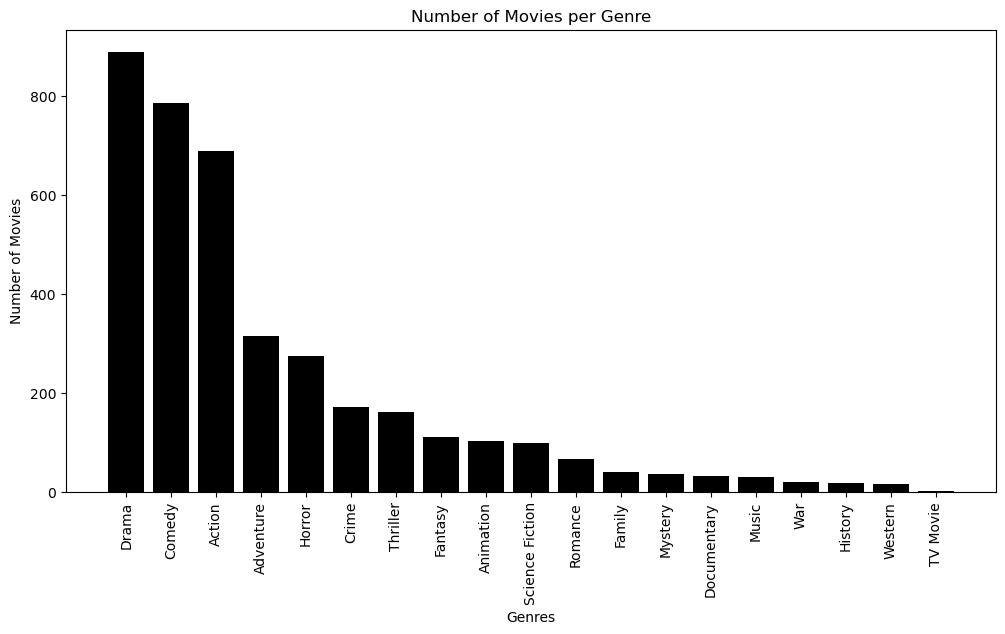

In [52]:
# Group the DataFrame by 'genre' and calculate the count of movies per genre
grouped_data = df.groupby('genre')['genre'].count()
sorted_genres = grouped_data.sort_values(ascending=False).index

# Generate the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_genres, grouped_data.loc[sorted_genres], alpha=1, align="center", color="black")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Genre")
plt.xticks(rotation=90)
plt.show()

# Observation
The movie genre with the most movies is Drama, followed closely by Comedy and Action, those 3 together seem to be much higher then all the other categories.

# What genre has the most movies per year on average?

In [59]:
#Group the dataframe by release year and by genere and calculate the avereage per genere per year
grouped_data = df.groupby('genre')['release_year'].nunique()
average_movies_per_year = grouped_data.mean()


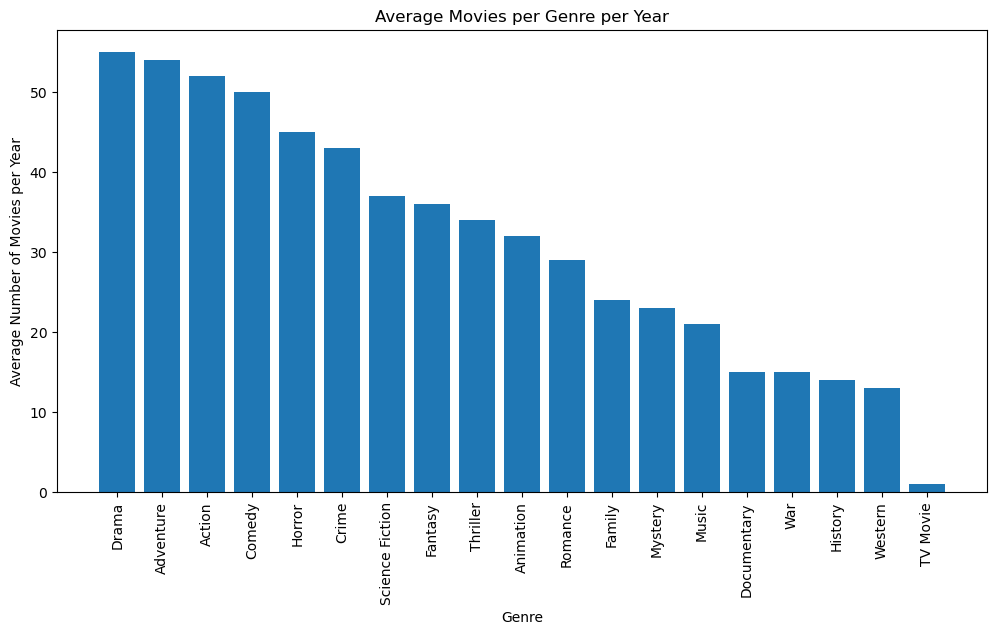

In [60]:
#bar chart to show the average per year by genre and see if it is the same order as total movies by genre
genres = grouped_data.index
average_movies = grouped_data.values

# Sort the genres in descending order based on the average number of movies per year
sorted_genres = grouped_data.sort_values(ascending=False).index
average_movies = grouped_data.loc[sorted_genres].values

# Generate the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_genres, average_movies)
plt.title('Average Movies per Genre per Year')
plt.xlabel('Genre')
plt.ylabel('Average Number of Movies per Year')
plt.xticks(rotation=90)
plt.show()

# Observation
The average per year per genre seems to tell a good story, even though drama is still the highest on the list it is much closer to the other genres, the reason for this could possibly be that darama had a few year span of large amounts of movies but does not on average have many per year

# Genre with the least profit


In [61]:
#add a column for profit
df['profit'] = df['revenue'] - df['budget']
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,release_date,release_year,genre,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,2015-06-09,2015,Action,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,2015-05-13,2015,Action,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,2015-03-18,2015,Adventure,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,2015-12-15,2015,Action,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,2015-04-01,2015,Action,1316249360


In [63]:
# Group the data by genre and profit
genre_profit = df.groupby('genre')['profit'].sum().reset_index()
#sort the genres in asc
genre_profit_sorted = genre_profit.sort_values('profit')
#get least profitable genre
least_profit_genre = genre_profit_sorted.iloc[0]['genre']
print("The genre with the least profit is:", least_profit_genre)

The genre with the least profit is: TV Movie


# Observation
The genre with the least profit is TV Movie

# Genre with the most profit

In [64]:
# Group the data by genre and profit
genre_profit = df.groupby('genre')['profit'].sum().reset_index()
#sort the genres in asc
genre_profit_sorted = genre_profit.sort_values('profit', ascending=False)
#get most profitable genre
most_profit_genre = genre_profit_sorted.iloc[0]['genre']
print("The genre with the most profit is:", most_profit_genre)

The genre with the most profit is: Action


# Observation
The genre with the most profit is Action